'\n##表示展示结果后注释掉的代码\n'

'\n#发现count列的数值差异很大，\n最大值和最小值相差很多。\n为了进一步观察，\n我们可以绘制一份散点图矩阵来看下。\n\n'

"\n'''\n3.4 windspeed列处理\n这里我们使用随机森林对训练集中windspeed值为0的数据进行回补。\n'''\n"

RandomForestRegressor(n_estimators=1000, random_state=42)

D:\Coding\Python\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


'\n3.5 测试集数据处理\n对训练集数据进行处理之后，我们同样需要对测试集进行数据清洗，需要注意的一点就是测试集我们不能删除数据，不然提交结果时会出错。\n\n先来看下测试集数据的散点图矩阵\n'

"\n#测试集中没有count列\nsns.pairplot(test_data[['temp','atemp','humidity','windspeed']])\n"

RandomForestRegressor(n_estimators=1000, random_state=42)

D:\Coding\Python\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,weekday,count_log,windspeed_rfr
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,2011,1,0,6,2.772589,8.665392
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,2011,1,1,6,3.688879,8.750580
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2011,1,2,6,3.465736,8.755193
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,2011,1,3,6,2.564949,6.571572
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,2011,1,4,6,0.000000,6.506484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17182,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,19,1,NaN,11.001400
17183,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,20,1,NaN,11.001400
17184,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,21,1,NaN,11.001400
17185,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,2012,12,22,1,NaN,8.998100


'\n4.0 数据分析与可视化\n'

<IPython.core.display.Javascript object>


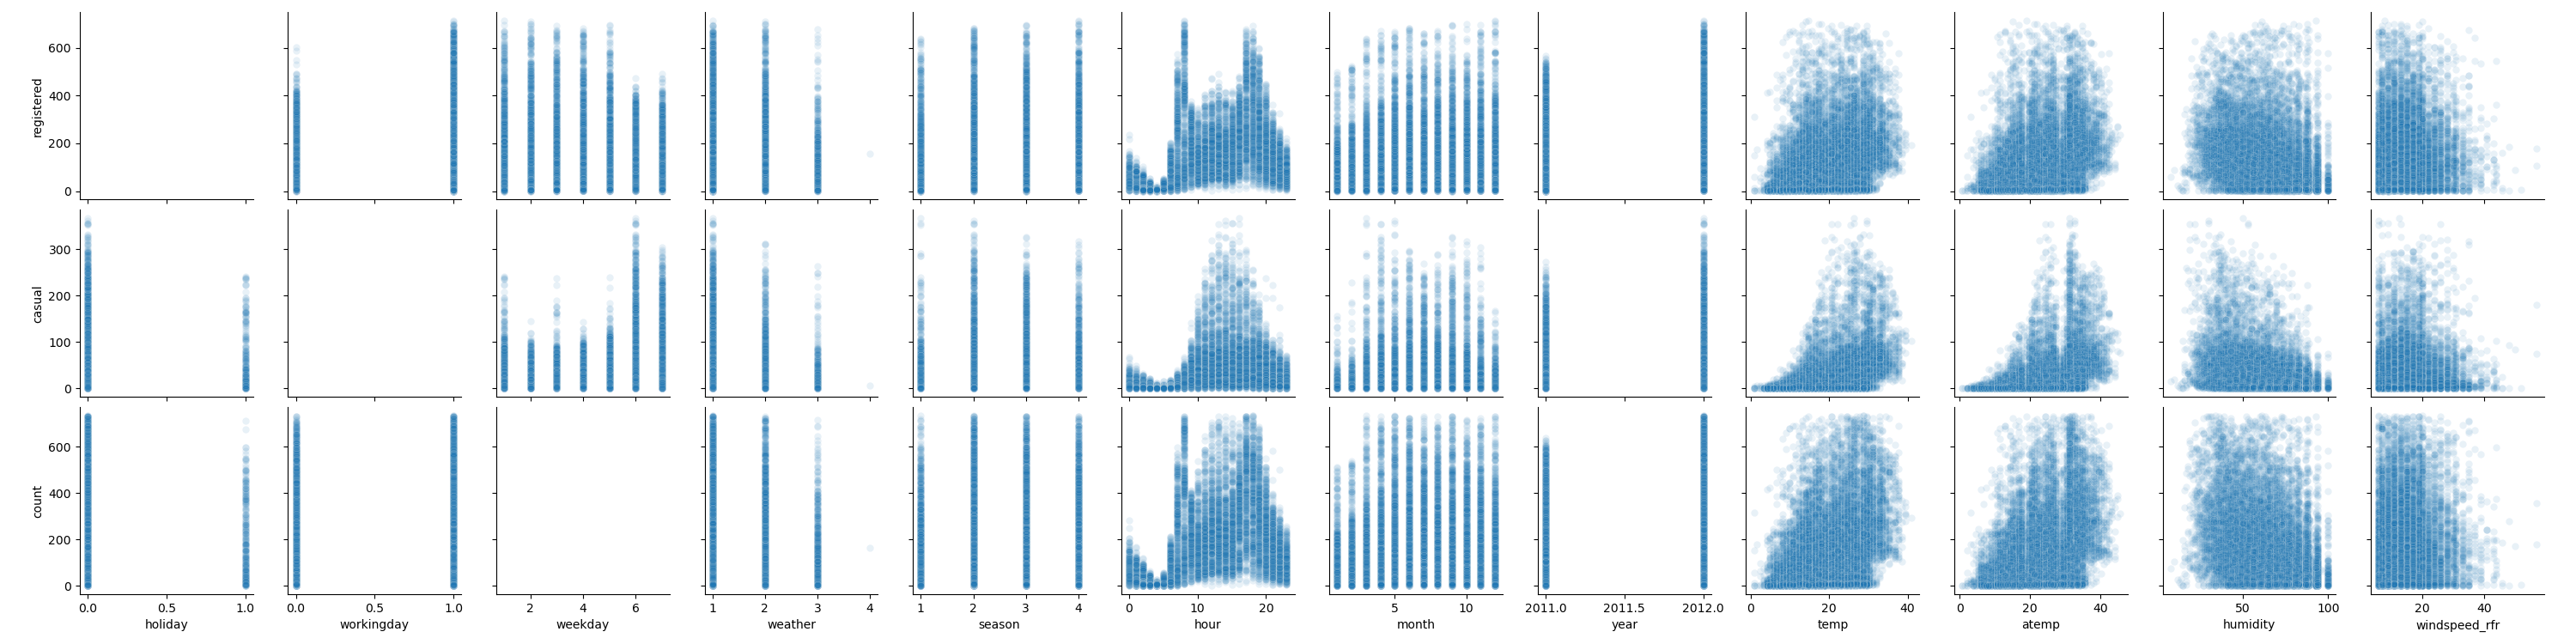

In [5]:
# coding: utf-8

# In[ ]:
'''
##表示展示结果后注释掉的代码
'''
#设置jupyter可以多行输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'



#让在jupyter绘图可以自由拖拽，实时显示坐标的魔术方法
get_ipython().magic('matplotlib notebook')

# 导入相关库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

# 读取数据
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#train_data.shape
#test_data.shape

##train_data[:5]#展示数据

#首先将datetime列进行拆分，方便后续的处理与分析。

#训练集datetime列处理
train_data['date']=train_data['datetime'].map(lambda x:parse(x).date())
train_data['year']=train_data['datetime'].map(lambda x:parse(x).year)
train_data['month']=train_data['datetime'].map(lambda x:parse(x).month)
train_data['hour']=train_data['datetime'].map(lambda x:parse(x).hour)
train_data.loc[:,('weekday')]=train_data['datetime'].map(lambda x:parse(x).isoweekday())

#测试集datetime列处理
test_data['date']=test_data['datetime'].map(lambda x:parse(x).date())
test_data['year']=test_data['datetime'].map(lambda x:parse(x).year)
test_data['month']=test_data['datetime'].map(lambda x:parse(x).month)
test_data['hour']=test_data['datetime'].map(lambda x:parse(x).hour)
test_data.loc[:,['weekday']]=test_data['datetime'].map(lambda x:parse(x).isoweekday())


#检查训练集集有无缺失数据
##train_data.info()

#检查训练集有无重复数据
##train_data.duplicated().value_counts()

#训练集和测试集都没有缺失值和重复值。
#先来看下训练集中的数值型数据情况
##train_data[['temp','atemp','humidity','windspeed','casual','registered','count']].describe()


'''
#发现count列的数值差异很大，
最大值和最小值相差很多。
为了进一步观察，
我们可以绘制一份散点图矩阵来看下。

'''

##sns.pairplot(train_data[['temp','atemp','humidity','windspeed','count']])

##3.1 atemp列处理
##len(train_data[(train_data['temp']-train_data['atemp'])>10])

#atemp列异常数据的量只有24个，数据量不大，可以直接剔除。
train_data = train_data[(train_data['temp']-train_data['atemp'])<=10]

##3.2 humidity列处理
##len(train_data[train_data['humidity']==0])

#humidity列值为0的数据量共22个，也是可以直接剔除。
train_data = train_data[train_data['humidity']!=0]

#3.3 count列处理
#剔除极端值
train_data_withoutoutliers = train_data[np.abs(train_data['count'] - train_data['count'].mean()) < (3 * train_data['count'].std())]

#去除异常值之后再看下count列的分布

#数据偏斜依旧很严重，所以这里我们需要将count列进行对数转换，减小波动。
train_data = train_data_withoutoutliers
train_data.loc[:,['count_log']] = np.log(train_data['count'])

"""
'''
3.4 windspeed列处理
这里我们使用随机森林对训练集中windspeed值为0的数据进行回补。
'''
"""



#2
train_data['windspeed_rfr'] = train_data['windspeed']

#将训练集数据分为风速值为0和不为0两部分
windspeed0_data = train_data[train_data['windspeed_rfr']==0]
windspeed1_data = train_data[train_data['windspeed_rfr']!=0]

#设定训练集数据
windspeed_columns = ['season','weather','temp','atemp','humidity','year','month','hour']
X_train = windspeed1_data[windspeed_columns].values
y_train = windspeed1_data['windspeed_rfr'].values

#生成回归器并进行拟合
windspeed_rfr = RandomForestRegressor(n_estimators=1000,random_state=42)
windspeed_rfr.fit(X_train,y_train)

#预测风速值
X_test = windspeed0_data[windspeed_columns].values
windspeed_pred = windspeed_rfr.predict(X_test)

#将预测值填充到风速为0的数据中，并将两个df合并
windspeed0_data.loc[:,['windspeed_rfr']] = windspeed_pred
train_data = pd.concat([windspeed0_data,windspeed1_data]).sort_values('datetime')
#2


'''
3.5 测试集数据处理
对训练集数据进行处理之后，我们同样需要对测试集进行数据清洗，需要注意的一点就是测试集我们不能删除数据，不然提交结果时会出错。

先来看下测试集数据的散点图矩阵
'''

'''
#测试集中没有count列
sns.pairplot(test_data[['temp','atemp','humidity','windspeed']])
'''
#windspeed列仍有大量值为0的异常数据，和训练集一样，我们使用随机森林对测试集windspeed值为0的数据进行回补。

test_data.loc[:,['windspeed_rfr']] = test_data['windspeed']

#将测试集数据分为风速值为0和不为0两部分
windspeed0_data = test_data[test_data['windspeed_rfr']==0]
windspeed1_data = test_data[test_data['windspeed_rfr']!=0]

#设定训练集数据

windspeed_columns = ['season','weather','temp','atemp','humidity','year','month','hour']
X_train = windspeed1_data[windspeed_columns].values


#判断变量

#print("{0}是{1}".format(X_train,getType(X_train)))

y_train = windspeed1_data['windspeed_rfr'].values

#windspeed_rfr1末尾加了1，
#生成回归器并进行拟合
windspeed_rfr1 = RandomForestRegressor(n_estimators=1000,random_state=42)
windspeed_rfr1.fit(X_train,y_train)

#预测风速值
X_test = windspeed0_data[windspeed_columns].values
windspeed_pred = windspeed_rfr1.predict(X_test)

#将预测值填充到风速为0的数据中，并将两个df合并
windspeed0_data.loc[:,['windspeed_rfr']] = windspeed_pred
test_data = pd.concat([windspeed0_data,windspeed1_data]).sort_values('datetime')

#将训练集和测试集合并
bike_data = pd.concat([train_data,test_data],ignore_index=True)
bike_data
'''
4.0 数据分析与可视化
'''
sns.pairplot(data=bike_data,x_vars=['holiday','workingday','weekday','weather','season','hour','month','year','temp','atemp','humidity','windspeed_rfr'],y_vars=['registered','casual','count'],plot_kws={'alpha': 0.1})



